## porespy + phbin

(c)pearcandy

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np
import phbin, cv2
import scipy
from IPython.display import display, Image
%matplotlib notebook

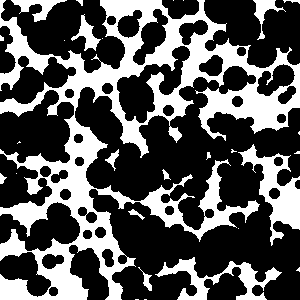

In [30]:
sem0 = ps.generators.polydisperse_spheres([300,300],0.4,scipy.stats.norm(loc=10,scale=5))
plt.imsave('./sem0.png',sem0,cmap='gray')
display(Image('./sem0.png'))

In [3]:
#sem_inv = np.invert(sem0)
#sem_inv

In [31]:
img, sem_bin = phbin.make_input_imgobj('./sem0.png',th=150)

## persistent homology

In [32]:
pds = phbin.make_pd([sem_bin],mode='sublevel',dim=0)

100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


<IPython.core.display.Javascript object>


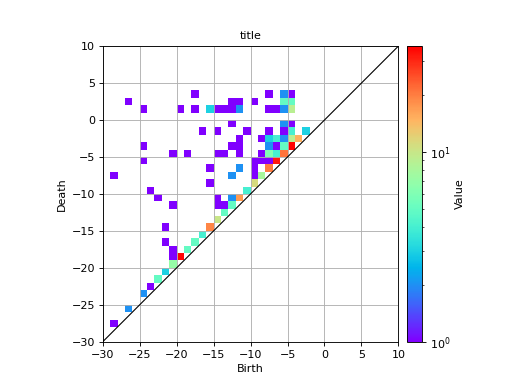

In [33]:
plt.close()
phbin.draw_pd(pds[0],x_range=[-30,10],x_bins=40)

<IPython.core.display.Javascript object>


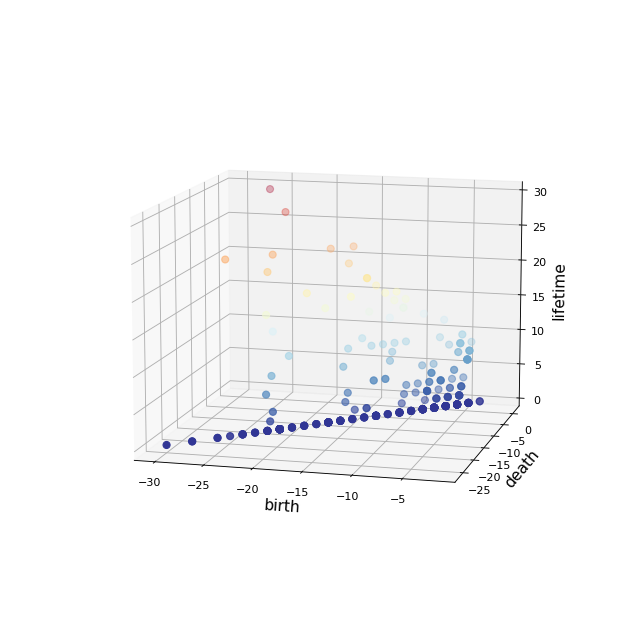

In [44]:
phbin.draw_pd_lifetime(pds[0])

In [34]:
pimage = phbin.make_pi(pds,mesh_range=(-30,10),bins=35,sigma=1.0,weight=('atan',0.0001,15),superlevel=False)

100%|██████████| 1/1 [00:00<00:00, 376.41it/s]


In [35]:
pi = np.array(pimage['pi'][0])
mesh = pimage['mesh']

In [36]:
plt.close()
plt.plot(pi)

<IPython.core.display.Javascript object>


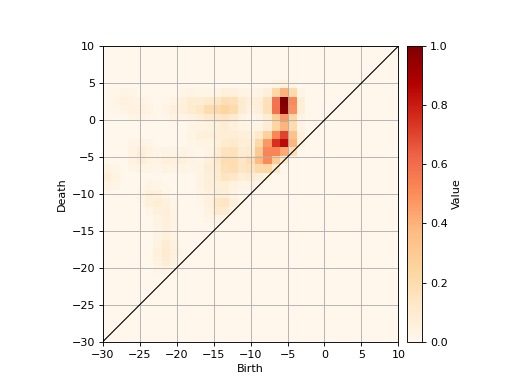

In [37]:
phbin.draw_pi(pi,mesh)

## Reverse Map

In [38]:
phtrees = phbin.make_phtrees([sem_bin],mode='sublevel',dim=0)

100%|██████████| 1/1 [00:02<00:00,  2.58s/it]


In [39]:
area = mesh.mask_from_vector(pi>0.2)

<IPython.core.display.Javascript object>


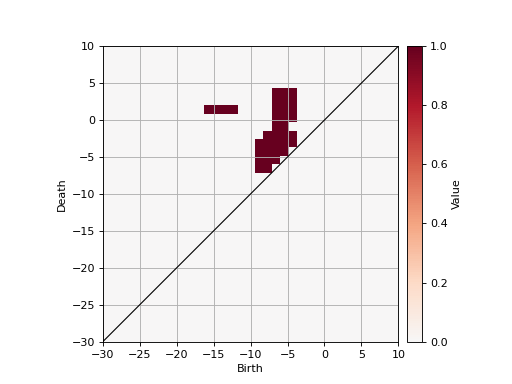

In [40]:
area.plot(colorbar={"type":"linear-midpoint","midpoint":0.0})

In [41]:
nodes = phbin.pd_filter(pds[0],phtrees[0],area)

In [42]:
phbin.reverse_map(nodes,img)

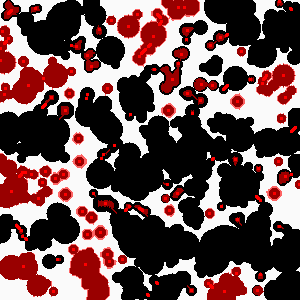

In [43]:
display(Image('./reverse.png'))

## Reverse Map2

In [66]:
nodes = phbin.pd_liftime_filter(pds[0],phtrees[0],th=20)

In [67]:
phbin.reverse_map(nodes,img)

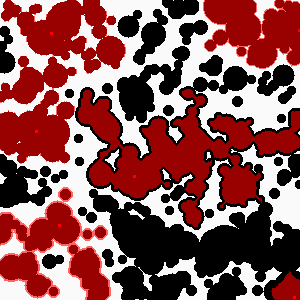

In [68]:
display(Image('./reverse.png'))